In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# dont show warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Grocery_Data.csv')
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [17]:
# Let's have a look on the shape of the dataset..........
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 8523, and columns are 12.


In [6]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [7]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [10]:
df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

<Axes: >

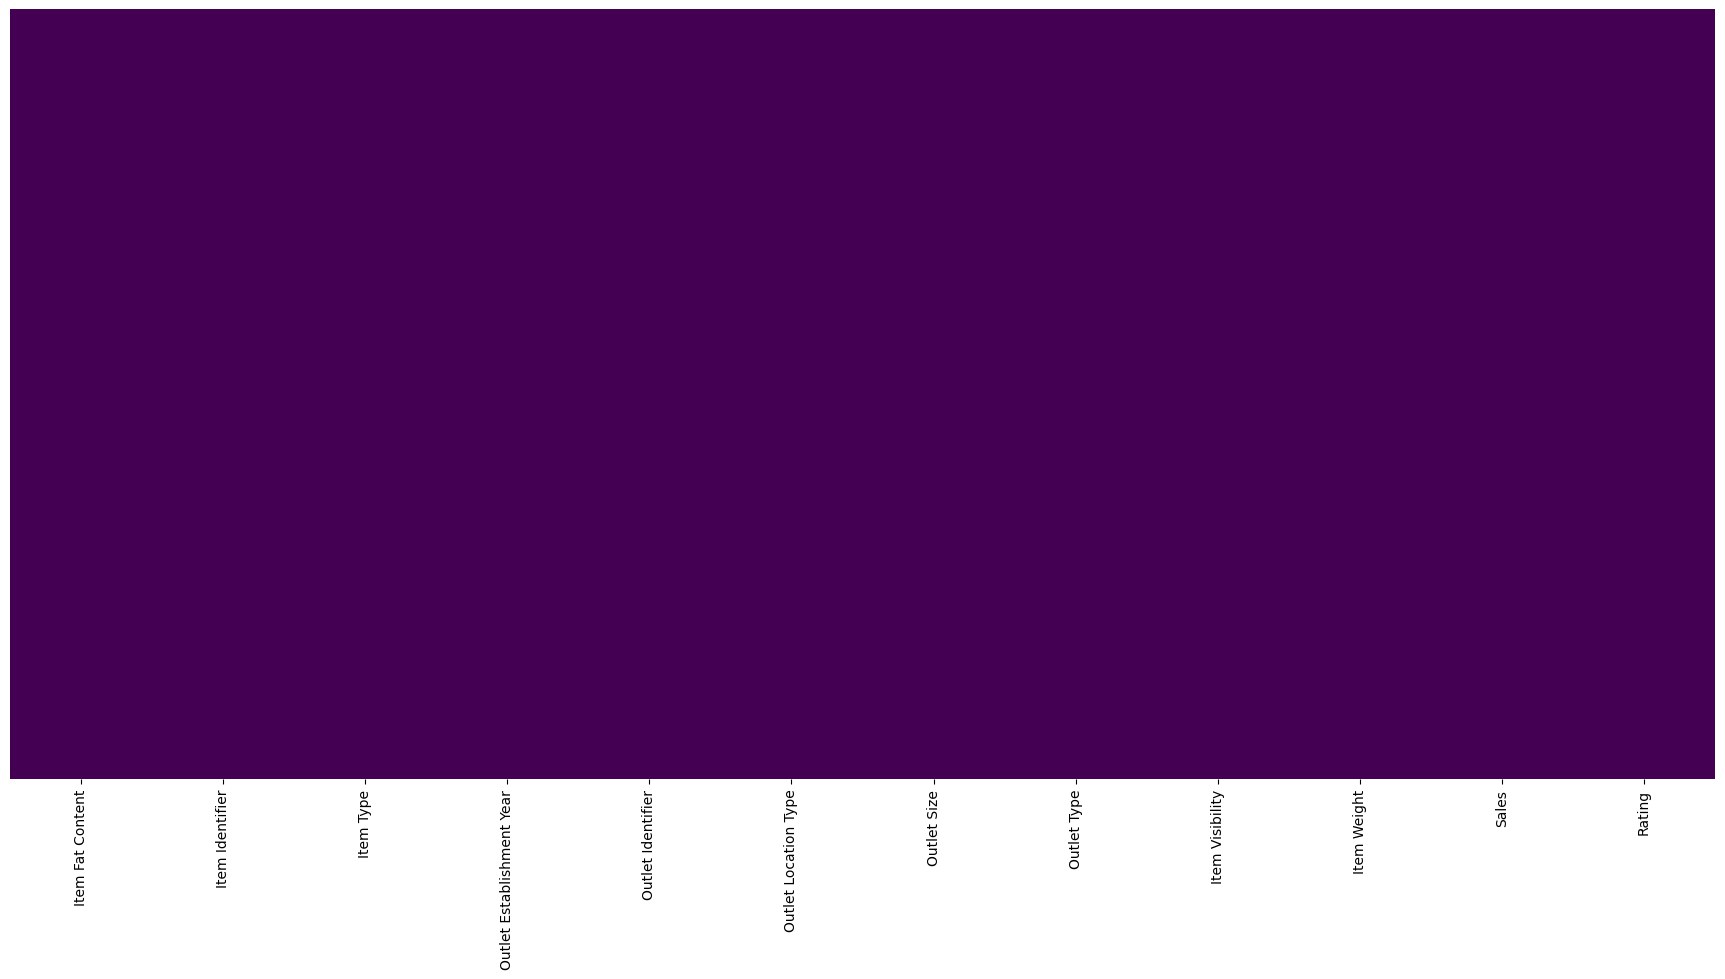

In [24]:
#Let's plot the missing values........

# make a figure size
plt.figure(figsize=(22, 10))
# plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

In [52]:
# Find duplicate rows............
duplicates = df[df.duplicated()]

# Display the duplicates..........
print(" Total duplicate rows found:", duplicates.shape[0])
print(duplicates)

 Total duplicate rows found: 0
Empty DataFrame
Columns: [Item Fat Content, Item Identifier, Item Type, Outlet Establishment Year, Outlet Identifier, Outlet Location Type, Outlet Size, Outlet Type, Item Visibility, Item Weight, Sales, Rating]
Index: []


In [14]:
df = df.drop_duplicates()
print(" Duplicates removed. Final row count:", df.shape[0])

 Duplicates removed. Final row count: 8523


In [25]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [26]:
any_duplicates = df.duplicated(subset=['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating']).any()
any_duplicates

False

In [16]:
# Let's see the column names
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [18]:
# Let's have a look on the columns and their data types using detailed info function..........
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
# Finding unusual string in rating column...........
df['Rating'].value_counts()

Rating
4.0    3339
4.3     694
4.2     673
4.1     524
5.0     427
4.4     340
3.9     302
4.5     256
3.8     253
3.7     211
3.0     193
3.5     171
3.6     150
3.3     121
1.0     114
4.6     102
3.4      83
4.7      79
2.0      74
4.8      62
3.2      55
2.8      49
3.1      49
2.5      48
2.3      26
2.9      24
2.7      21
4.9      15
2.6      14
2.4      11
1.5      11
2.2       9
1.7       8
1.8       5
2.1       4
1.9       2
1.3       2
1.4       1
1.2       1
Name: count, dtype: int64

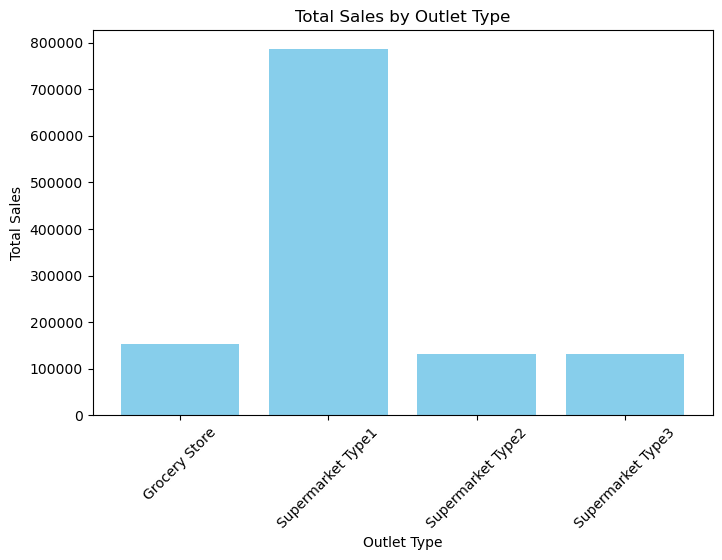

In [31]:
# Group data by Outlet Type
sales_by_outlet = df.groupby('Outlet Type')['Sales'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(sales_by_outlet['Outlet Type'], sales_by_outlet['Sales'], color='skyblue')
plt.title("Total Sales by Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x500 with 0 Axes>

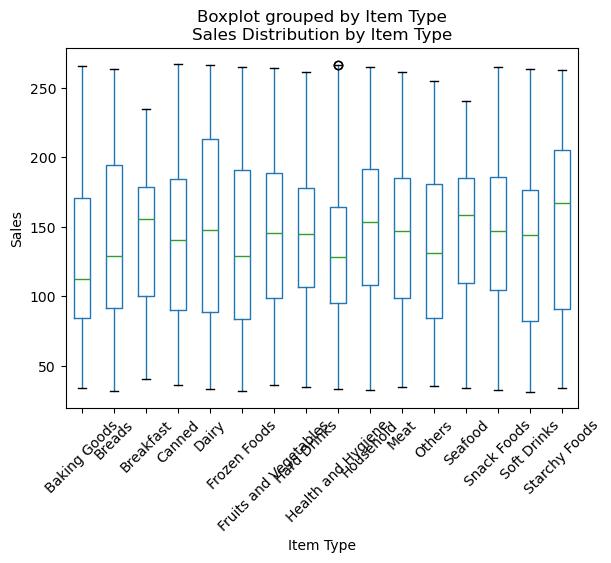

In [33]:
# box plot for Sales Distribution by Item Type......
plt.figure(figsize=(10,5))
df.boxplot(column='Sales', by='Item Type', grid=False)
plt.title("Sales Distribution by Item Type")
plt.suptitle("")  
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

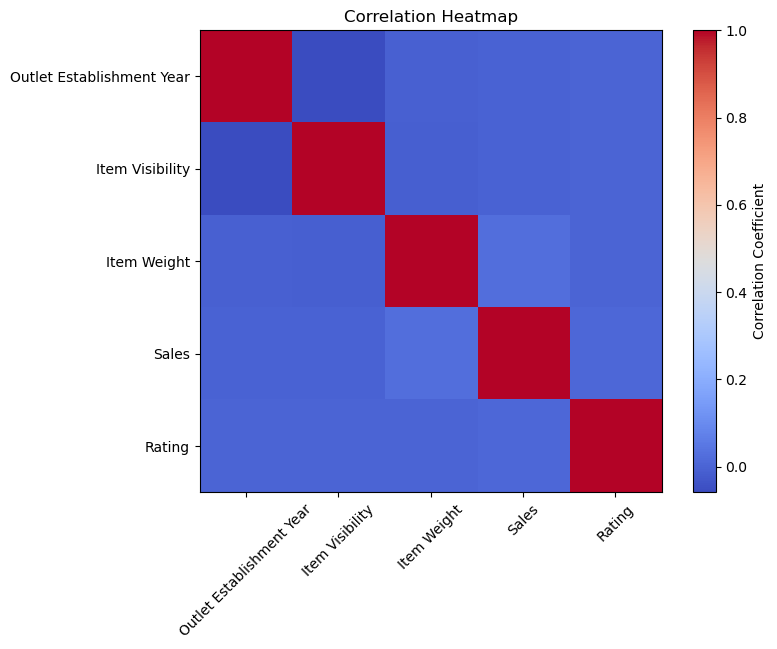

In [34]:
# Calculate correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

# Plot heatmap manually using Matplotlib
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

 Top Performing Product Category: Fruits and Vegetables with total sales = 178124.081


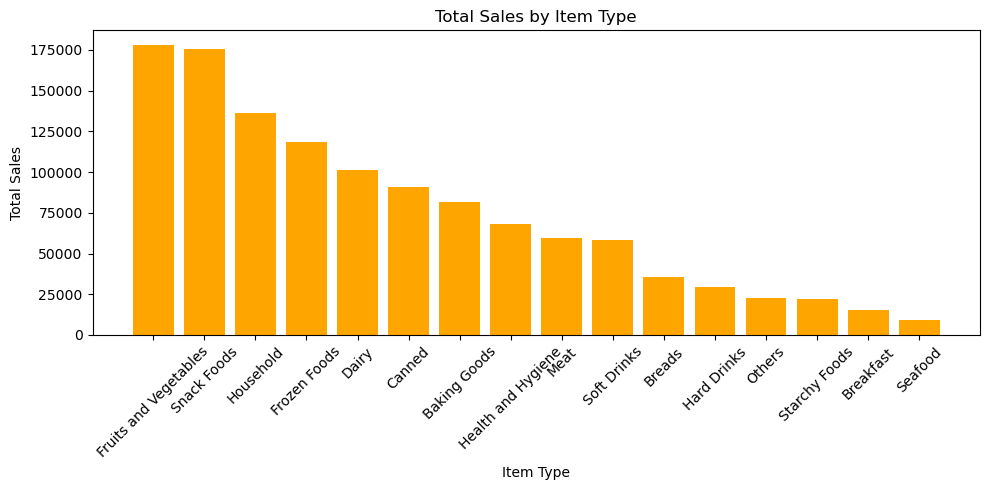

In [39]:
# Group data by Item Type and calculate total sales
item_sales = df.groupby('Item Type')['Sales'].sum().reset_index()

# Sort in descending order
item_sales = item_sales.sort_values(by='Sales', ascending=False)

# Display top performing product category
top_item = item_sales.iloc[0]
print(f" Top Performing Product Category: {top_item['Item Type']} with total sales = {top_item['Sales']}")

# Plot bar chart
plt.figure(figsize=(10,5))
plt.bar(item_sales['Item Type'], item_sales['Sales'], color='orange')
plt.title("Total Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Highest Average Sales Outlet Type: Supermarket Type2 with average sales = 141.68


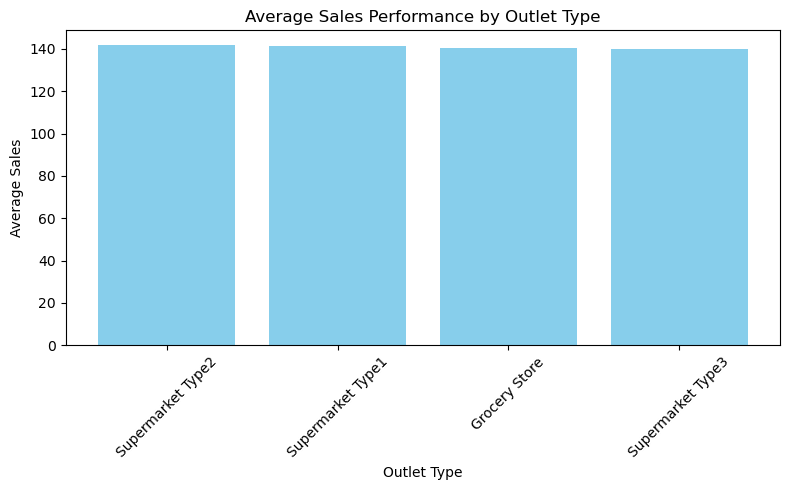

In [41]:
# Group data by Outlet Type and calculate average sales
avg_sales = df.groupby('Outlet Type')['Sales'].mean().reset_index()

# Sort in descending order
avg_sales = avg_sales.sort_values(by='Sales', ascending=False)

# Display top performing outlet type
top_outlet = avg_sales.iloc[0]
print(f"Highest Average Sales Outlet Type: {top_outlet['Outlet Type']} with average sales = {top_outlet['Sales']:.2f}")

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(avg_sales['Outlet Type'], avg_sales['Sales'], color='skyblue')
plt.title("Average Sales Performance by Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

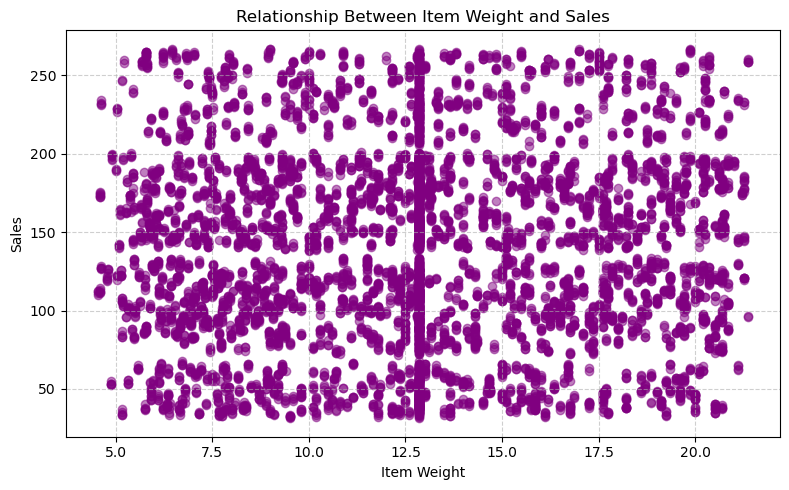

 Correlation between Item Weight and Sales: 0.02


In [43]:
# Handle missing values in Item Weight
df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())

# Scatter plot: Item Weight vs Sales
plt.figure(figsize=(8,5))
plt.scatter(df['Item Weight'], df['Sales'], alpha=0.5, color='purple')
plt.title("Relationship Between Item Weight and Sales")
plt.xlabel("Item Weight")
plt.ylabel("Sales")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['Item Weight'].corr(df['Sales'])
print(f" Correlation between Item Weight and Sales: {correlation:.2f}")

 Highest Sales Location Type: Tier 3 with total sales = 472133.0332


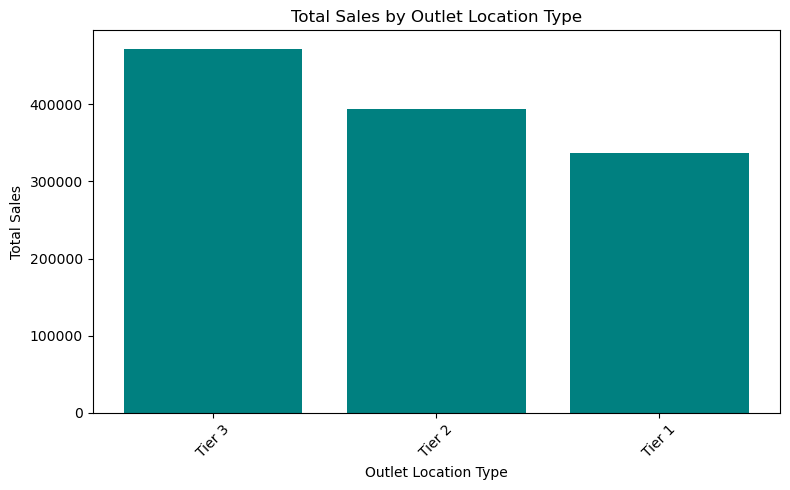

In [45]:
# Group data by Outlet Location Type and calculate total sales
location_sales = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()

# Sort in descending order
location_sales = location_sales.sort_values(by='Sales', ascending=False)

# Display top location type
top_location = location_sales.iloc[0]
print(f" Highest Sales Location Type: {top_location['Outlet Location Type']} with total sales = {top_location['Sales']}")

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(location_sales['Outlet Location Type'], location_sales['Sales'], color='teal')
plt.title("Total Sales by Outlet Location Type")
plt.xlabel("Outlet Location Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most Popular Fat Content: Low Fat with total sales = 776319.6884


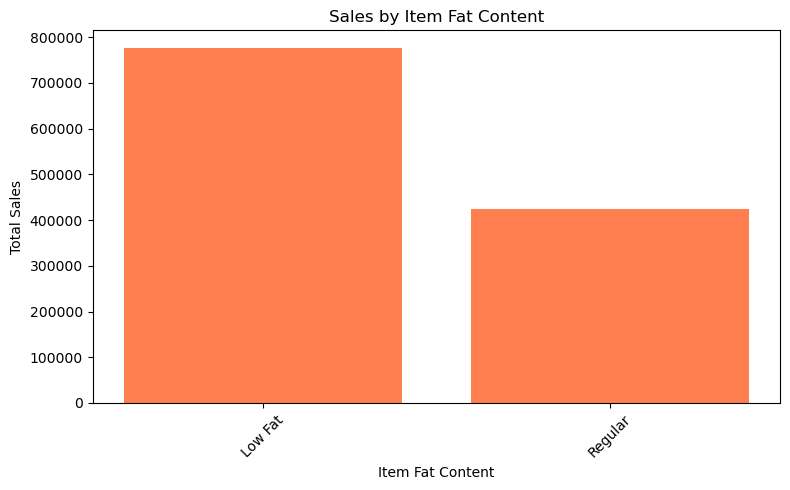

In [51]:
# Clean and map Item Fat Content values
df['Item Fat Content'] = df['Item Fat Content'].str.strip().str.lower()

# Map variations to standard values
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'lf': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular',
    'regular': 'Regular'
})

# Group data by Item Fat Content and calculate total sales
fat_sales = df.groupby('Item Fat Content')['Sales'].sum().reset_index()

# Sort in descending order
fat_sales = fat_sales.sort_values(by='Sales', ascending=False)

# Display top fat content type
top_fat = fat_sales.iloc[0]
print(f"Most Popular Fat Content: {top_fat['Item Fat Content']} with total sales = {top_fat['Sales']}")

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(fat_sales['Item Fat Content'], fat_sales['Sales'], color='coral')
plt.title("Sales by Item Fat Content")
plt.xlabel("Item Fat Content")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Highest Sales Outlet Size: Medium with total sales = 507895.7364


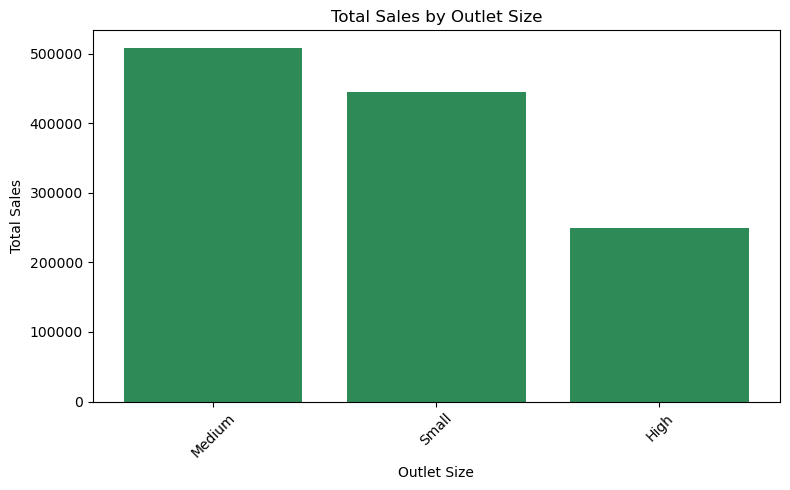

In [54]:
# Clean and standardize Outlet Size column
df['Outlet Size'] = df['Outlet Size'].str.strip().str.title()

# Group data by Outlet Size and calculate total sales
size_sales = df.groupby('Outlet Size')['Sales'].sum().reset_index()

# Sort by sales
size_sales = size_sales.sort_values(by='Sales', ascending=False)

# Display top performing outlet size
top_size = size_sales.iloc[0]
print(f" Highest Sales Outlet Size: {top_size['Outlet Size']} with total sales = {top_size['Sales']}")

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(size_sales['Outlet Size'], size_sales['Sales'], color='seagreen')
plt.title("Total Sales by Outlet Size")
plt.xlabel("Outlet Size")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Top-Performing Store: OUT035 with total sales = 133103.907


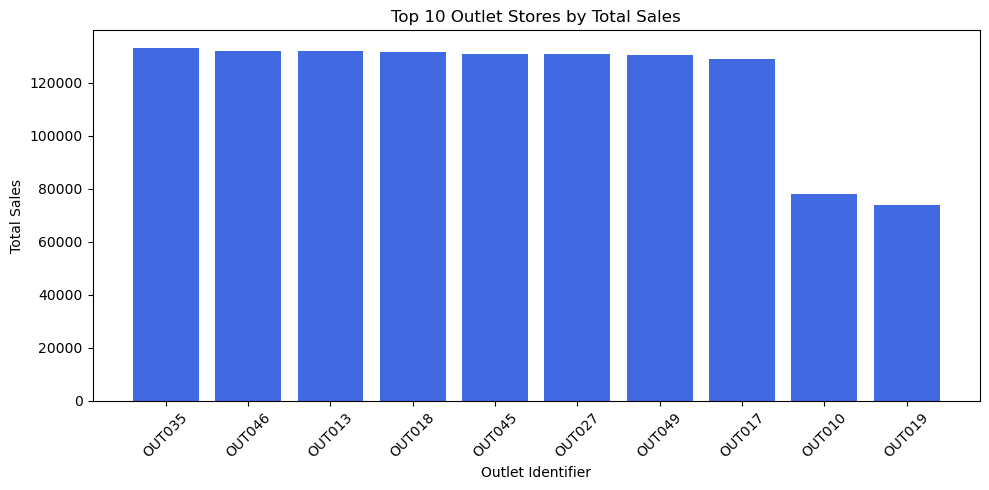

In [56]:
# Group data by Outlet Identifier and calculate total sales
store_sales = df.groupby('Outlet Identifier')['Sales'].sum().reset_index()

# Sort in descending order
store_sales = store_sales.sort_values(by='Sales', ascending=False)

# Display top performing store
top_store = store_sales.iloc[0]
print(f" Top-Performing Store: {top_store['Outlet Identifier']} with total sales = {top_store['Sales']}")

# Plot top 10 performing stores
plt.figure(figsize=(10,5))
plt.bar(store_sales['Outlet Identifier'][:10], store_sales['Sales'][:10], color='royalblue')
plt.title("Top 10 Outlet Stores by Total Sales")
plt.xlabel("Outlet Identifier")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Year with Highest Sales: 2018 with total sales = 204522.257


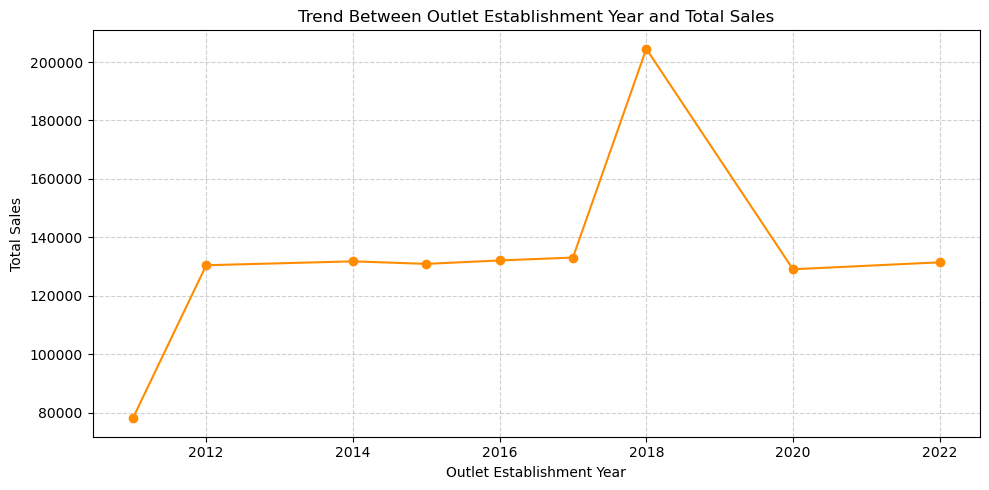

In [58]:
# Group data by Outlet Establishment Year and calculate total sales
year_sales = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index()

# Sort by year
year_sales = year_sales.sort_values(by='Outlet Establishment Year')

# Display year with highest sales
top_year = year_sales.loc[year_sales['Sales'].idxmax()]
print(f"Year with Highest Sales: {int(top_year['Outlet Establishment Year'])} with total sales = {top_year['Sales']}")

# Plot line chart for trend
plt.figure(figsize=(10,5))
plt.plot(year_sales['Outlet Establishment Year'], year_sales['Sales'], marker='o', color='darkorange')
plt.title("Trend Between Outlet Establishment Year and Total Sales")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

 Highest Rated Item Type: Meat with average rating = 4.02


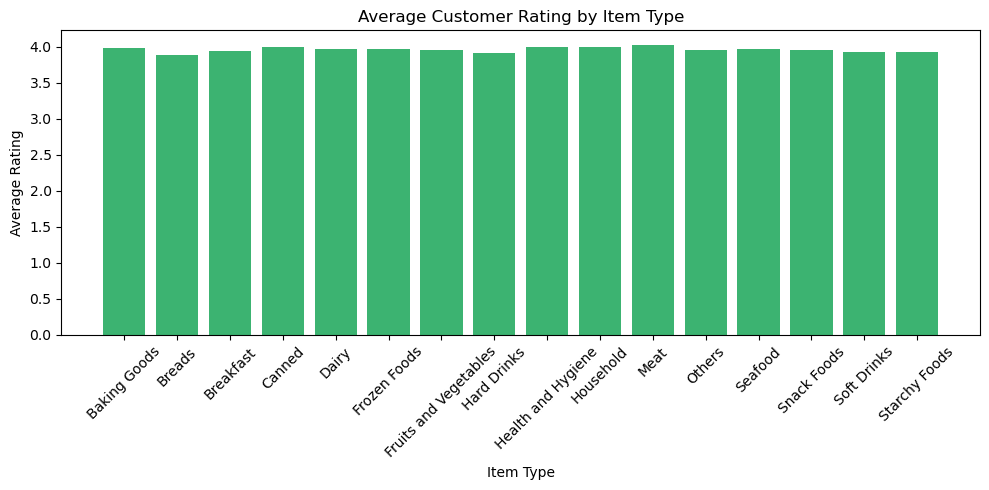

 Correlation between customer rating and sales: 0.01


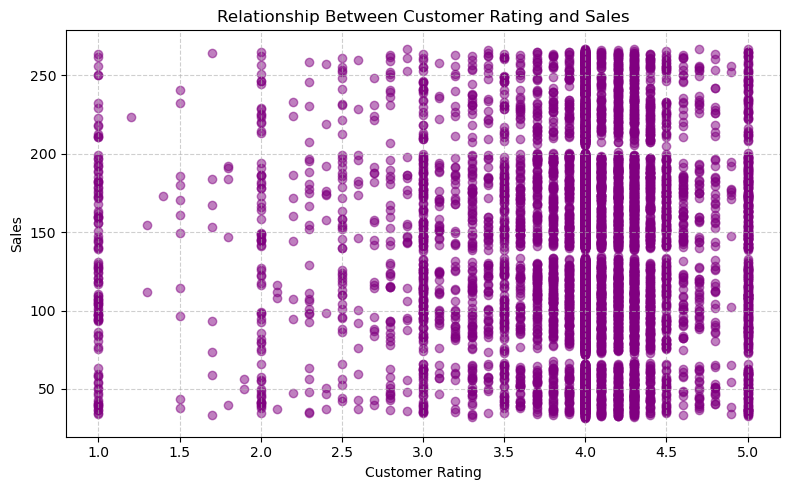

In [60]:
# Group data by Item Type and calculate average rating and total sales
rating_sales = df.groupby('Item Type').agg({
    'Rating': 'mean',
    'Sales': 'sum'
}).reset_index()

# Find item type with highest average rating
top_rated = rating_sales.loc[rating_sales['Rating'].idxmax()]
print(f" Highest Rated Item Type: {top_rated['Item Type']} with average rating = {top_rated['Rating']:.2f}")

# Plot bar chart for average rating
plt.figure(figsize=(10,5))
plt.bar(rating_sales['Item Type'], rating_sales['Rating'], color='mediumseagreen')
plt.title("Average Customer Rating by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check correlation between rating and sales
correlation = df['Rating'].corr(df['Sales'])
print(f" Correlation between customer rating and sales: {correlation:.2f}")

# Scatter plot to visualize rating vs sales
plt.figure(figsize=(8,5))
plt.scatter(df['Rating'], df['Sales'], alpha=0.5, color='purple')
plt.title("Relationship Between Customer Rating and Sales")
plt.xlabel("Customer Rating")
plt.ylabel("Sales")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

 Consistently Top Performing Outlet Type: Supermarket Type2 with average sales = 141.18


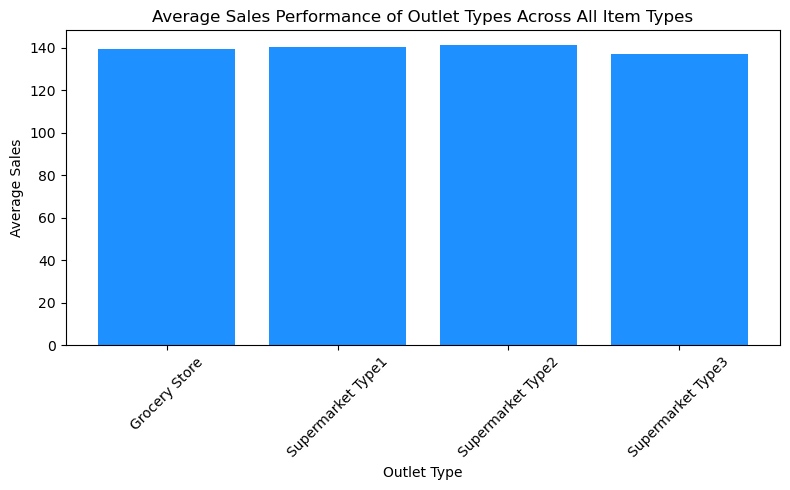

In [62]:
# Group data by Outlet Type and Item Type to calculate average sales
outlet_item_sales = df.groupby(['Outlet Type', 'Item Type'])['Sales'].mean().reset_index()

# Calculate overall average sales per outlet type
overall_avg_sales = outlet_item_sales.groupby('Outlet Type')['Sales'].mean().reset_index()

# Find the consistently top-performing outlet type
top_outlet = overall_avg_sales.loc[overall_avg_sales['Sales'].idxmax()]
print(f" Consistently Top Performing Outlet Type: {top_outlet['Outlet Type']} with average sales = {top_outlet['Sales']:.2f}")

# Plot bar chart for comparison
plt.figure(figsize=(8,5))
plt.bar(overall_avg_sales['Outlet Type'], overall_avg_sales['Sales'], color='dodgerblue')
plt.title("Average Sales Performance of Outlet Types Across All Item Types")
plt.xlabel("Outlet Type")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

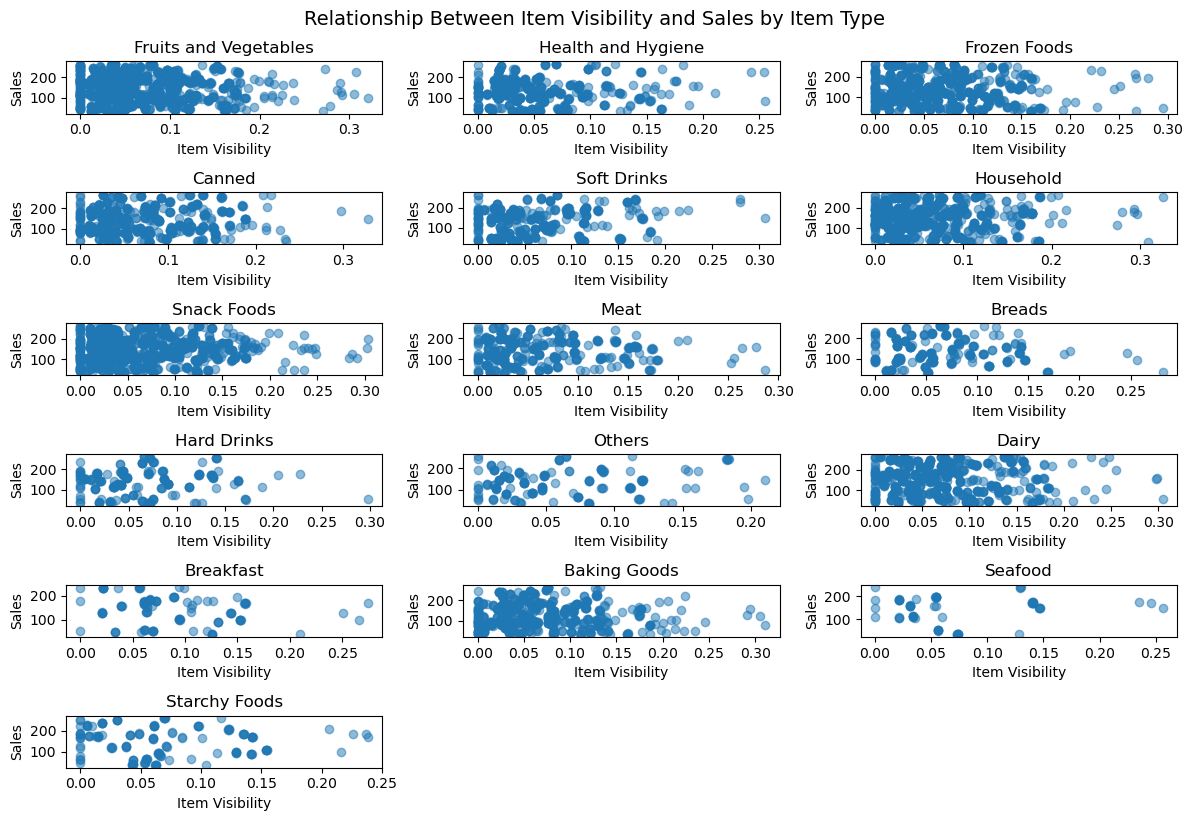

 Correlation between Item Visibility and Sales by Item Type:

Item Type
Baking Goods            -0.023912
Breads                  -0.084153
Breakfast               -0.236782
Canned                   0.062003
Dairy                   -0.023271
Frozen Foods            -0.064695
Fruits and Vegetables   -0.046523
Hard Drinks              0.060078
Health and Hygiene      -0.003113
Household                0.020226
Meat                    -0.026564
Others                   0.115294
Seafood                  0.128381
Snack Foods              0.011591
Soft Drinks              0.167860
Starchy Foods           -0.062933
dtype: float64


In [64]:
# Create scatter plots for each Item Type
item_types = df['Item Type'].unique()

plt.figure(figsize=(12, 8))

for i, item in enumerate(item_types, 1):
    plt.subplot((len(item_types)//3)+1, 3, i)
    subset = df[df['Item Type'] == item]
    plt.scatter(subset['Item Visibility'], subset['Sales'], alpha=0.5)
    plt.title(item)
    plt.xlabel('Item Visibility')
    plt.ylabel('Sales')

plt.tight_layout()
plt.suptitle("Relationship Between Item Visibility and Sales by Item Type", fontsize=14, y=1.02)
plt.show()

# Calculate correlation for each item type
correlation_results = df.groupby('Item Type').apply(lambda x: x['Item Visibility'].corr(x['Sales']))
print(" Correlation between Item Visibility and Sales by Item Type:\n")
print(correlation_results)

 Top 5 Products Contributing the Most to Total Sales:
     Item Identifier      Sales
976            FDU12  2371.0112
921            FDT07  2306.8970
1454           NCQ06  2294.7126
616            FDL58  2111.6544
1279           NCB31  2104.7280


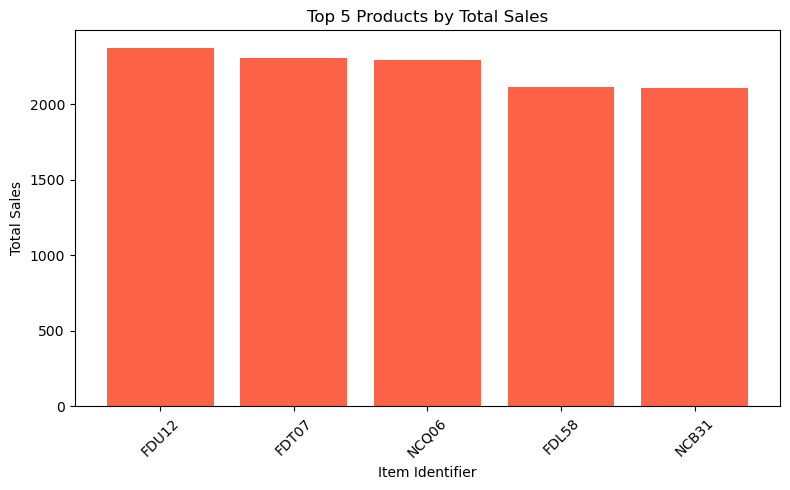

In [66]:
# Group data by Item Identifier and calculate total sales
top_products = df.groupby('Item Identifier')['Sales'].sum().reset_index()

# Sort in descending order and select top 5
top_products = top_products.sort_values(by='Sales', ascending=False).head(5)

# Display top 5 products
print(" Top 5 Products Contributing the Most to Total Sales:")
print(top_products)

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(top_products['Item Identifier'], top_products['Sales'], color='tomato')
plt.title("Top 5 Products by Total Sales")
plt.xlabel("Item Identifier")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()